In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset

ds = load_dataset("kmack/Phishing_urls")

In [ ]:
ds

In [3]:
train_df = ds['train'].to_pandas()

In [4]:
test_df = ds['test'].to_pandas()
valid_df = ds['valid'].to_pandas()

In [5]:
import pandas as pd

# assuming you have 'id' or can hash rows
train_hashes = set(train_df.apply(lambda x: hash(tuple(x)), axis=1))
test_hashes = set(test_df.apply(lambda x: hash(tuple(x)), axis=1))
valid_hashes = set(valid_df.apply(lambda x: hash(tuple(x)), axis=1))

print("Train-Test overlap:", len(train_hashes & test_hashes))
print("Train-Valid overlap:", len(train_hashes & valid_hashes))
print("Test-Valid overlap:", len(test_hashes & valid_hashes))


Train-Test overlap: 0
Train-Valid overlap: 0
Test-Valid overlap: 0


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

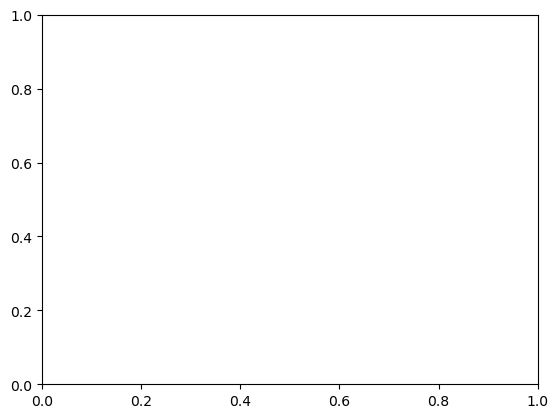

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "text"
sns.kdeplot(train_df[feature], label="Train")
sns.kdeplot(valid_df[feature], label="Valid")
sns.kdeplot(test_df[feature], label="Test")
plt.legend()
plt.show()


In [7]:
print(train_df.head(),test_df.head(),valid_df.head())


                                                text  label
0             xenophongroup.com/montjoie/compgns.htm      0
1    www.azzali.eu/&usg=AOvVaw2phVSb_ENMrkATGNx5LQ0l      1
2                     guildmusic.edu.au/js/index.htm      1
3  memo.unexpectedrunner.com/ezxgytw4et\nholotili...      1
4  en.wikipedia.org/wiki/Category:American_televi...      0                                                 text  label
0    www.linuxplanet.com/linuxplanet/reviews/4149/1/      1
1  sdnmargorejo1-403.sch.id/images/login.alibaba....      1
2  '9d345009-a-62cb3a1a-s-sites.googlegroups.com/...      0
3            everyculture.com/Ma-Ni/New-Zealand.html      0
4                    www.aoseocn.acseosn.selfie.ltd/      1                                                 text  label
0       absoluteastronomy.com/topics/Sri_Lankan_Navy      0
1                    www.angelfire.com/amiga/grotto/      1
2  www.etc-meisai.jp.lmxnzp.shop/kaduxn.php?lia71...      1
3  http://torcache.net/torrent/DCA42EC92

In [8]:
print("Shape of the training dataset is :",train_df.shape)
print("No. of missing values :",train_df.isnull().sum())
print("Duplicate values in urls:",train_df["text"].duplicated().sum())
print("Number of unique values : ",train_df.nunique())

Shape of the training dataset is : (567056, 2)
No. of missing values : text     0
label    0
dtype: int64
Duplicate values in urls: 31218
Number of unique values :  text     535838
label         2
dtype: int64


In [9]:

train_df = train_df.drop_duplicates(subset =['text'])

In [ ]:
import pandas as pd
import numpy as np
import re


In [ ]:
import math

In [ ]:
import re

text = "My email is test123@example.com"
pattern = r"\w+@\w+\.\w+"

match = re.search(pattern, text)
if match:
    print("Found email:", match.group())


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score


In [12]:
import re

def clean_url(url):
    url = url.lower().strip()
    url = re.sub(r'https?://', '', url)       # remove http/https
    url = re.sub(r'www\.', '', url)           # remove www
    url = re.sub(r'[^a-z0-9./?=_-]', '', url) # keep only useful chars
    return url

train_df['text'] = train_df['text'].apply(clean_url)
valid_df['text'] = valid_df['text'].apply(clean_url)
test_df['text'] = test_df['text'].apply(clean_url)


In [15]:
def clean_url(url):
    url = url.lower().strip()
    url = re.sub(r'https?://', '', url)    # optional
    url = re.sub(r'www\.', '', url)
    # keep important phishing indicators
    url = re.sub(r'[^a-z0-9./?@=_-]', '', url)
    return url


In [16]:
train_df['text'] = train_df['text'].apply(clean_url)
valid_df['text'] = valid_df['text'].apply(clean_url)
test_df['text'] = test_df['text'].apply(clean_url)

In [17]:
train_df.duplicated().sum()

np.int64(0)

In [14]:
train_df = train_df.drop_duplicates(subset =['text'])

In [18]:
tokenizer = Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(
    train_df['text'].tolist() + valid_df['text'].tolist() + test_df['text'].tolist()
)
vocab_size = len(tokenizer.word_index) + 1
print("New vocab size:", vocab_size)


New vocab size: 43


Character level tokenization

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Character-level tokenizer
tokenizer_char = Tokenizer(char_level=True, lower=True)
tokenizer_char.fit_on_texts(
    train_df['text'].tolist() + valid_df['text'].tolist() + test_df['text'].tolist()
)

vocab_size = len(tokenizer_char.word_index) + 1
print("Character-level vocab size:", vocab_size)

# Example
example = "https://login-paypa1.com/secure"
print("Char-level tokens:", tokenizer_char.texts_to_sequences([example]))


Character-level vocab size: 43
Char-level tokens: [[18, 6, 6, 15, 7, 10, 10, 13, 2, 20, 5, 9, 16, 15, 3, 26, 15, 3, 22, 8, 4, 2, 12, 10, 7, 1, 4, 17, 11, 1]]


Word level tokenization

In [ ]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer

# Split URLs into meaningful chunks
def split_url(url):
    parts = re.split(r'[./?=_\-]+', url)   # split by common URL symbols
    parts = [p for p in parts if p]        # remove empty strings
    return " ".join(parts)                 # join for tokenizer

# Apply to all datasets
train_urls = train_df['text'].apply(split_url)
valid_urls = valid_df['text'].apply(split_url)
test_urls  = test_df['text'].apply(split_url)

# Word-part-level tokenizer
tokenizer_word = Tokenizer(char_level=False, lower=True)
tokenizer_word.fit_on_texts(
    train_urls.tolist() + valid_urls.tolist() + test_urls.tolist()
)

vocab_size_word = len(tokenizer_word.word_index) + 1
print("Word-part-level vocab size:", vocab_size_word)

# Example
example = "https://login-paypa1.com/secure"
print("Word-part tokens:", tokenizer_word.texts_to_sequences([split_url(example)]))


Word-part-level vocab size: 657449
Word-part tokens: [[393, 6, 19968, 1, 54]]


In [ ]:
# Combine text for fitting tokenizer
all_texts = train_df['text'].tolist() + valid_df['text'].tolist() + test_df['text'].tolist()

tokenizer = Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(all_texts)

# Convert to sequences
maxlen = 200  # trunc/pad length
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=maxlen)
X_valid = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)

y_train = train_df['label'].values
y_valid = valid_df['label'].values
y_test = test_df['label'].values

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)


Vocab size: 43


In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),

    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalMaxPooling1D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 77s 137ms/step - accuracy: 0.7820 - loss: 0.4852 - val_accuracy: 0.8493 - val_loss: 0.4800 - learning_rate: 0.0010
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 64s 126ms/step - accuracy: 0.8814 - loss: 0.2855 - val_accuracy: 0.8597 - val_loss: 0.3285 - learning_rate: 0.0010
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.8928 - loss: 0.2577 - val_accuracy: 0.8689 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 4/10
226/505 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step - accuracy: 0.8997 - loss: 0.2415

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


2216/2216 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     35239
           1       0.86      0.89      0.87     35643

    accuracy                           0.87     70882
   macro avg       0.87      0.87      0.87     70882
weighted avg       0.87      0.87      0.87     70882

ROC-AUC: 0.8716478682272485


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title("Accuracy over epochs"); plt.show()


including bilstm

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

model_up = Sequential([
    Embedding(vocab_size, 128),
    Conv1D(256, 7, activation='relu', padding='same'),
    MaxPooling1D(3),
    Conv1D(128, 5, activation='relu', padding='same'),
    MaxPooling1D(3),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
model_up.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_up.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

history = model_up.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 71s 127ms/step - accuracy: 0.7902 - loss: 0.4367 - val_accuracy: 0.8631 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.8844 - loss: 0.2813 - val_accuracy: 0.8653 - val_loss: 0.3118 - learning_rate: 0.0010
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.8965 - loss: 0.2492 - val_accuracy: 0.8716 - val_loss: 0.2942 - learning_rate: 0.0010
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.9017 - loss: 0.2350 - val_accuracy: 0.8745 - val_loss: 0.2835 - learning_rate: 0.0010
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 122ms/step - accuracy: 0.9073 - loss: 0.2203 - val_accuracy: 0.8706 - val_loss: 0.2931 - learning_rate: 0.0010
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9119 - loss: 0.2091 - val_accuracy: 0.8753 - val_loss: 0.2795 - learning_rate: 0.0010
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 122ms/step - accuracy: 0.9

In [ ]:
y_pred_up = (model_up.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_up))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_up))


2216/2216 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     35239
           1       0.86      0.90      0.88     35643

    accuracy                           0.88     70882
   macro avg       0.88      0.87      0.87     70882
weighted avg       0.88      0.88      0.87     70882

ROC-AUC: 0.8748934304524261


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from sklearn.model_selection import train_test_split

# --- Split dataset into 3 clients ---
client_dfs = np.array_split(train_df, 3)

def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, 128, embeddings_initializer=HeNormal()),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Federated training function ---
def federated_train(client_dfs, rounds=5, local_epochs=1, batch_size=1024):
    # Initialize global model
    global_model = build_model(vocab_size, maxlen)

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []

        for i, df in enumerate(client_dfs):
            print(f"Client {i+1}: training on {len(df)} samples")

            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone global model to client
            client_model = clone_model(global_model)
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Collect weights and sizes
            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))

        # Weighted average of client weights
        new_weights = []
        for weights in zip(*client_weights):
            avg = np.sum([w * size for w, size in zip(weights, client_sizes)], axis=0) / np.sum(client_sizes)
            new_weights.append(avg)

        # Update global model
        global_model.set_weights(new_weights)
        print(f"Round {r+1} completed. Global model updated.")

    return global_model

# --- Run federated training ---
global_model = federated_train(client_dfs, rounds=5, local_epochs=1)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



=== Federated Round 1/5 ===
Client 1: training on 172170 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.7142 - loss: 0.5288
Client 2: training on 172170 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7237 - loss: 0.5216
Client 3: training on 172169 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7112 - loss: 0.5292


ValueError: You called `set_weights(weights)` on layer 'sequential_3' with a weight list of length 15, but the layer was expecting 0 weights.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, BatchNormalization, Activation,
    MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPooling1D
)
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import gelu, mish

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 256
maxlen = 200
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 5  # Number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA FAIRLY
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)

# ----------------------------
# MODEL BUILD FUNCTION
# ----------------------------
def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, embeddings_initializer=HeNormal(), input_length=maxlen),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []
        client_val_scores = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone and force-build client model
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Evaluate client model on global validation
            val_loss, val_acc = client_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
            print(f"Client {i+1} validation accuracy: {val_acc:.4f}")

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))
            client_val_scores.append(val_acc)

        # ----------------------------
        # VALIDATION-AWARE WEIGHT AGGREGATION
        # ----------------------------
        # Normalize validation scores to use as weight multipliers
        val_scores_np = np.array(client_val_scores)
        val_weights = val_scores_np / val_scores_np.sum()

        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size * val_w for w, size, val_w in zip(weights, client_sizes, val_weights)], axis=0)
            weighted_avg /= np.sum([size * val_w for size, val_w in zip(client_sizes, val_weights)])
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train(client_dfs, global_model, X_val, y_val,
                               rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



=== Federated Round 1/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - accuracy: 0.6583 - loss: 0.5917
Client 1 validation accuracy: 0.8263
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.6758 - loss: 0.5721
Client 2 validation accuracy: 0.8204
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.6606 - loss: 0.5895
Client 3 validation accuracy: 0.8306
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.6711 - loss: 0.5799
Client 4 validation accuracy: 0.8311
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.6626 - loss: 0.5868
Client 5 validation accuracy: 0.8275
Global validation accuracy after round 1: 0.8275, loss: 0.4010

=== Federated Round 2/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.8063 - loss: 0.4335
Client 1 validation accuracy: 0.8322
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8162 - loss: 0.4180
Client 2 validation accuracy: 0.8438
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.8186 - loss: 0.4

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8617 - loss: 0.3167

Test Accuracy: 0.8627, Test Loss: 0.3153
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8794    0.8388    0.8586     35239
           1     0.8476    0.8862    0.8665     35643

    accuracy                         0.8627     70882
   macro avg     0.8635    0.8625    0.8625     70882
weighted avg     0.8634    0.8627    0.8626     70882


Test ROC-AUC: 0.9377


UPDATING THE MODEL

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 128
maxlen = 300
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 5  # Number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA FAIRLY
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)

# ----------------------------
# MODEL BUILD FUNCTION
# ----------------------------
def build_model(vocab_size, maxlen):
    model = Sequential([
        # ------------------------------
        # 1️⃣ Embedding Layer
        # ------------------------------
        Embedding(
            input_dim=vocab_size,
            output_dim=128,
            input_length=maxlen,
            embeddings_initializer=HeNormal()
        ),

        # ------------------------------
        # 2️⃣ Deep Convolutional Feature Extractors
        # ------------------------------
        Conv1D(256, 7, strides=1, padding='same', kernel_initializer=HeNormal()),
        BatchNormalization(),
        Activation(mish),  # smoother than GELU, handles rare patterns better
        MaxPooling1D(2),

        Conv1D(256, 5, strides=1, padding='same', kernel_initializer=HeNormal()),
        BatchNormalization(),
        Activation(gelu),
        MaxPooling1D(2),

        # A small residual-style block
        Conv1D(128, 3, padding='same', activation='gelu', kernel_initializer=HeNormal()),
        BatchNormalization(),
        Conv1D(128, 3, padding='same', activation='gelu', kernel_initializer=HeNormal()),
        MaxPooling1D(2),

        # ------------------------------
        # 3️⃣ BiLSTM for sequential dependency capture
        # ------------------------------
        Bidirectional(LSTM(128, return_sequences=True, dropout=0.3)),
        GlobalMaxPooling1D(),

        # ------------------------------
        # 4️⃣ Fully Connected Layers
        # ------------------------------
        Dense(256, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.4),

        # ------------------------------
        # 5️⃣ Output Layer
        # ------------------------------
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])

    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []
        client_val_scores = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone and force-build client model
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Evaluate client model on global validation
            val_loss, val_acc = client_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
            print(f"Client {i+1} validation accuracy: {val_acc:.4f}")

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))
            client_val_scores.append(val_acc)

        # ----------------------------
        # VALIDATION-AWARE WEIGHT AGGREGATION
        # ----------------------------
        # Normalize validation scores to use as weight multipliers
        val_scores_np = np.array(client_val_scores)
        val_weights = val_scores_np / val_scores_np.sum()

        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size * val_w for w, size, val_w in zip(weights, client_sizes, val_weights)], axis=0)
            weighted_avg /= np.sum([size * val_w for size, val_w in zip(client_sizes, val_weights)])
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train(client_dfs, global_model, X_val, y_val,
                               rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Federated Round 1/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 53s 445ms/step - accuracy: 0.5657 - loss: 0.6716
Client 1 validation accuracy: 0.7836
101/101 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.5826 - loss: 0.6578
Client 2 validation accuracy: 0.7942
101/101 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.5991 - loss: 0.6469
Client 3 validation accuracy: 0.7731
101/101 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.5842 - loss: 0.6532
Client 4 validation accuracy: 0.7426
101/101 ━━━━━━━━━━━━━━━━━━━━ 50s 440ms/step - accuracy: 0.6048 - loss: 0.6386
Client 5 validation accuracy: 0.7678
Global validation accuracy after round 1: 0.4988, loss: 0.6997

=== Federated Round 2/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 48s 412ms/step - accuracy: 0.7990 - loss: 0.4355
Client 1 validation accuracy: 0.8262
101/101 ━━━━━━━━━━━━━━━━━━━━ 47s 411ms/step - accuracy: 0.7985 - loss: 0.4374
Client 2 validation accuracy: 0.8266
101/101 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.8007 - loss: 0.4

AttributeError: 'Adam' object has no attribute 'lr'

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.8521 - loss: 0.3256

Test Accuracy: 0.8525, Test Loss: 0.3253
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8312    0.8826    0.8561     35239
           1     0.8764    0.8228    0.8487     35643

    accuracy                         0.8525     70882
   macro avg     0.8538    0.8527    0.8524     70882
weighted avg     0.8539    0.8525    0.8524     70882


Test ROC-AUC: 0.9394


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 128
maxlen = 200
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 4  # number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA INTO CLIENTS
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)

# ----------------------------
# MODEL BUILD FUNCTION
# ----------------------------
def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, embeddings_initializer=HeNormal(), input_length=maxlen),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train_simple(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone global model for client
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))

        # ----------------------------
        # WEIGHTED AVERAGE OF CLIENT WEIGHTS
        # ----------------------------
        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size for w, size in zip(weights, client_sizes)], axis=0) / np.sum(client_sizes)
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train_simple(client_dfs, global_model, X_val, y_val,
                                      rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Federated Round 1/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 158ms/step - accuracy: 0.6965 - loss: 0.5479
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.7130 - loss: 0.5319
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.6803 - loss: 0.5645
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.6889 - loss: 0.5583
Global validation accuracy after round 1: 0.8334, loss: 0.3915

=== Federated Round 2/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8094 - loss: 0.4311
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8059 - loss: 0.4393
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.8106 - loss: 0.4329
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8045 - loss: 0.4432
Global validation accuracy after round 2: 0.8538, loss: 0.3393

=== Federated Round 3/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8453 - loss: 0.3561
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8527 - loss: 0.3520
127/127

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8653 - loss: 0.3067

Test Accuracy: 0.8660, Test Loss: 0.3054
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8828    0.8423    0.8621     35239
           1     0.8509    0.8894    0.8697     35643

    accuracy                         0.8660     70882
   macro avg     0.8668    0.8659    0.8659     70882
weighted avg     0.8667    0.8660    0.8659     70882


Test ROC-AUC: 0.9412


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8653 - loss: 0.3067

Test Accuracy: 0.8660, Test Loss: 0.3054
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8828    0.8423    0.8621     35239
           1     0.8509    0.8894    0.8697     35643

    accuracy                         0.8660     70882
   macro avg     0.8668    0.8659    0.8659     70882
weighted avg     0.8667    0.8660    0.8659     70882


Test ROC-AUC: 0.9412


In [ ]:
from concurrent.futures import ThreadPoolExecutor

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout , LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 256
maxlen = 200
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 5  # Number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA FAIRLY
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)



def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, 128, input_length=maxlen, embeddings_initializer=HeNormal()),

        # --- Convolutional Feature Extraction ---
        Conv1D(256, 7, padding='same', kernel_initializer=HeNormal()),
        LeakyReLU(alpha=0.1),
        MaxPooling1D(3),

        Conv1D(128, 5, padding='same', kernel_initializer=HeNormal()),
        LeakyReLU(alpha=0.1),
        MaxPooling1D(3),

        # --- Sequential Context Encoding ---
        Bidirectional(LSTM(64, return_sequences=False, kernel_initializer=HeNormal())),
        Dropout(0.4),

        # --- Dense Layers ---
        Dense(128, kernel_initializer=HeNormal()),
        LeakyReLU(alpha=0.1),
        Dropout(0.5),

        # --- Output Layer ---
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    def train_client(df):
        X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
        y_client = df['label'].values

        model = clone_model(global_model)
        model(tf.zeros((1, maxlen), dtype=tf.int32))
        model.set_weights(global_model.get_weights())
        model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=0)
        val_loss, val_acc = model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        return model.get_weights(), len(df), val_acc

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        with ThreadPoolExecutor(max_workers=n_clients) as executor:
            results = list(executor.map(train_client, client_dfs))
        client_weights = []
        client_sizes = []
        client_val_scores = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone and force-build client model
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Evaluate client model on global validation
            val_loss, val_acc = client_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
            print(f"Client {i+1} validation accuracy: {val_acc:.4f}")

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))
            client_val_scores.append(val_acc)

        # ----------------------------
        # VALIDATION-AWARE WEIGHT AGGREGATION
        # ----------------------------
        # Normalize validation scores to use as weight multipliers
        val_scores_np = np.array(client_val_scores)
        val_weights = val_scores_np / val_scores_np.sum()

        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size * val_w for w, size, val_w in zip(weights, client_sizes, val_weights)], axis=0)
            weighted_avg /= np.sum([size * val_w for size, val_w in zip(client_sizes, val_weights)])
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train(client_dfs, global_model, X_val, y_val,
                               rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)



=== Federated Round 1/5 ===


101/101 ━━━━━━━━━━━━━━━━━━━━ 791s 8s/step - accuracy: 0.6583 - loss: 0.5922
Client 1 validation accuracy: 0.8060
101/101 ━━━━━━━━━━━━━━━━━━━━ 780s 8s/step - accuracy: 0.6515 - loss: 0.6027
Client 2 validation accuracy: 0.8141
101/101 ━━━━━━━━━━━━━━━━━━━━ 776s 8s/step - accuracy: 0.6448 - loss: 0.6133
Client 3 validation accuracy: 0.8157
101/101 ━━━━━━━━━━━━━━━━━━━━ 778s 8s/step - accuracy: 0.6501 - loss: 0.6072
Client 4 validation accuracy: 0.8200
101/101 ━━━━━━━━━━━━━━━━━━━━ 780s 8s/step - accuracy: 0.6665 - loss: 0.5870
Client 5 validation accuracy: 0.8251
Global validation accuracy after round 1: 0.7880, loss: 0.4787

=== Federated Round 2/5 ===
